# MOD510: Project 1

**Deadline: 15. September 2024 (23:59)**


**Group members**

* Member 1

* Member 2



# Abstract
Write abstract here 


# Introduction
Write intro here 


# Exercise 1: Finite-precision arithmetic

## Part 1

In [1]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

A float in python is 64 bit double presistion floating point number. Using the sys.float_info we can among other things see that maximum and minimum value that a float can represent in Python. We can also se the machine presision $\epsilon_M$. This is the smallest number we can add to one and still get a value larger than one (shown in the code below). 

In [2]:
eps = sys.float_info.epsilon
print(1 + eps > 1) #Should return True

True


## Part 2



$$\pm q2^{E-e} \tag{1}$$

## Part 3

## Part 4

# Exercise 2: Get up to speed with NumPy

## Part 1

To create a list that has the same elements as the numpy array, I used a for loop. My first thought was to set start value in the range function as 0, stop value as 1 and step value as 0.1, but since the range function only allows integers I had to finesse my way around this. How i have solved this you can see in the code below. Also worth noticing is that inside the append function i have written (10 - 1) in the denominator. According to the np.linspace() documentation (https://numpy.org/devdocs/reference/generated/numpy.linspace.html) the endpoint is by default included, so in order for the elements in my list to match the array I had to write (10 - 1) in the denominator.

In [3]:
import numpy as np

In [4]:
x = []
for i in range(0,10): 
    x.append(i/(10-1))

When we put to list into the np.exp() function it seems to convert it to an array and gives the same output as when x was an array  

In [5]:
#Works fine
print('exp(x) =', np.exp(x))  # Apply f(t)=exp(t) to each element in the array x.

exp(x) = [1.         1.11751907 1.24884887 1.39561243 1.5596235  1.742909
 1.94773404 2.17662993 2.43242545 2.71828183]


When we try to compute -x on the other hand we get an error. When we in class preformed multiplications on list like for example $2 \cdot [1, 2, 3]$ we get $[1, 2, 3, 1, 2, 3]$. It repeates to list 2 times. Writing $-x$ is the same as saying $(-1) \cdot x$. We can not repeat a list negative one times. This is why I think we get an error.

In [6]:
#Gives an error
try:
    print('exp(-x) =',np.exp(-x))
except Exception as e:
  print(f'Line has failed with error: {e}')

Line has failed with error: bad operand type for unary -: 'list'


Generally if i had to evaluate a function on all elements of a native Python list I would do this in a for loop like this: 

In [7]:
import math 

new_list = []

for i in range(len(x)): 
    calc_val = math.exp(x[i])
    new_list.append(calc_val)

print(new_list)

[1.0, 1.1175190687418637, 1.2488488690016821, 1.3956124250860895, 1.5596234976067807, 1.7429089986334578, 1.9477340410546757, 2.1766299317162483, 2.4324254542872077, 2.718281828459045]


## Part 2

np.zeros() returns an array containing zeros. The shape of the array is determend by the first input. In the example the input is just 20. The function will then return a (1,20) array. By default the data type of the array is a float. 

In [8]:
np.zeros(20)

#Example of other uses
#np.zeros((2,3), dtype = 'int') #returns a (2,3) array with int datatype

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

Following code is my way to recreate np.zeros() with vanilla python. For simplicity the following code will return a list of zeros with a given length and datatype is float.

In [9]:
length = 20 
zeros_list = [] 

for i in range(length): 
    zeros_list.append(0.)

print(zeros_list)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


np.ones() returns an array containing ones. Like the zeros function the shape of the array is determend by the first input. In the example the input is just 20. The function will then return a (1,20) array. By default the data type of the array is a float. 

In [10]:
np.ones(20)

#Example of other uses
#np.zeros((3,4), dtype = 'int') #returns a (3,4) array with int datatype

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

To recreate np.ones() with vanilla python I only need to change the input in the append function. Also her for simplicity the following code will return a list of ones with a given length and datatype is float.

In [11]:
length = 20 
ones_list = [] 

for i in range(length): 
    ones_list.append(1.)

print(ones_list)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


The np.linspace() functions returns an array with evenly spaced numbers on a given interval. In the example below the starting value is 0 the end value is 10 and the number of samples is 11. 

In [12]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

To recreate this with vanilla Python I am using a for loop. First i define a start value and stop value, the value num is the number of samples we want. Next i create an empty list and define the first value to add to the list, which has to be the start value. Furthermore, i calculate the ingrement. The (num-1) in the denominator is because the endpoint is included (as previously explained in exercise 2 part 1). Lastly a for loop adds the numbers to a list.

In [13]:
start = 0
stop = 10
num = 11

linspace_list = [] 
num_to_add = start
ingrement = (start + stop) / (num - 1)

for i in range(start,num): 
    linspace_list.append(num_to_add)
    num_to_add += ingrement

print(linspace_list)

[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In the following code the endpoint is not included (endpoint = False).

In [14]:
np.linspace(0, 10, 11, endpoint=False)

array([0.        , 0.90909091, 1.81818182, 2.72727273, 3.63636364,
       4.54545455, 5.45454545, 6.36363636, 7.27272727, 8.18181818,
       9.09090909])

To recreate this with vanilla Python we just have to make a small adjustment to our previous code. That adjust is that we remove the -1 for (num-1) as follows. 

In [15]:
start = 0
stop = 10
num = 11

linspace_list = [] 
num_to_add = start
ingrement = (start + stop) / num #removed the -1

for i in range(start,num): 
    linspace_list.append(num_to_add)
    num_to_add += ingrement

print(linspace_list)

[0, 0.9090909090909091, 1.8181818181818181, 2.727272727272727, 3.6363636363636362, 4.545454545454545, 5.454545454545454, 6.363636363636363, 7.2727272727272725, 8.181818181818182, 9.09090909090909]


The np.arrange() function is very simular to the np.linspace() function. Both return an evenly spaced array given a start, stop and step value. The np.arrange on the otherhand does not seem to have any endpoint handling. When only writing np.arrage(5) the function will return an open intervall $\left[0,\text{stop}\right)$ mean an array like this $[0,1,2,3,4]$. By adding $+1$ the values in the array shifts one to the right returning $[1,2,3,4,5]$. By again multipling this list by $2$ every element in the array get multiplied by to giving us $[2,4,5,8,10]$.

In [16]:
vector = np.arange(5) + 1
2*vector

array([ 2,  4,  6,  8, 10])

I recreate this in vanilla Python using a for loop. The loop will run 5 times and since the initial value of $i = 0$ the end point will not be included. The math operations adding by one and multiplying by two i have preformed in the append() function so that it preforms these opration on every element just like intended. 

In [17]:
arange_list = []
stop = 5

for i in range(0,stop):
    arange_list.append(2*i + 2) #Adding the + 1 and muliply ever element with 2. Could have written 2*(i + 1)

print(arange_list)

[2, 4, 6, 8, 10]


## Part 3

In [18]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42,0,5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = is_even & is_greater_than_17

There are 7 non-zero numbers in the array.


The code above work fine, but this following line of code does not run.

In [19]:
try:
    is_even_and_greater_than_17 = is_even and is_greater_than_17
except Exception as e:
  print(f'Line has failed with error: {e}')

Line has failed with error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Both is_even and is_greater_than_17 are arrays. The "and" operator according to (https://www.geeksforgeeks.org/python/difference-between-and-and-in-python/) expets a boolean value on both sides, here there is an array on both sides. Therefore we have to use "&" instead which is the bitwise operator. Below is a working code that gives the expeted value that only the number $42$ is both even and greater than $17$. Since it is specified that we have to use np.logical_and(), but according to the numpy documentation (https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html) both work the same.

In [20]:
#is_even_and_greater_than_17 = is_even & is_greater_than_17
is_even_and_greater_than_17 = np.logical_and(is_even, is_greater_than_17)
print(is_even_and_greater_than_17)

[False False False False False  True False False]


The following code does not work.

In [21]:
try:
    print(array_of_numbers % 2 == 0 & array_of_numbers > 17)
except Exception as e:
  print(f'Line has failed with error: {e}')

Line has failed with error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


It may seem that Python does not read the line inside of print as intended. By adding paranthese we make sure Python reads it as intended. This seems to work, and gives us the same result.

In [22]:
print((array_of_numbers % 2 == 0) & (array_of_numbers > 17))

[False False False False False  True False False]


## Part 4

The numpy.where() function takes in a condtion (in our case: array_of_numbers > 17) and returns an array with elements location that follows the set condtion. For the array_of_numbers the numbers that are greater than $17$ are $23$ and $42$ which are element number $4$ and $5$ (the first element is $0$). The function returns a tuple so the $[0]$ is added to get the first element in the tuple, since the second element is just blank. 

In [23]:
np.where(array_of_numbers > 17)[0]

array([4, 5], dtype=int64)

You can also spesify what you want reurned when the condition is True or False. In the following line of code you get a $0$ if the element is not greater than $17$ and $1$ if the element is greater then $17$.

In [24]:
np.where(array_of_numbers > 17, 1, 0)

array([0, 0, 0, 0, 1, 1, 0, 0])

# Exercise 3, Part I: Finite Differences (FD) with Functions

Intro written here

## Part 1

In [25]:
def f(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)

In [26]:
import matplotlib.pyplot as plt

def plotter(func, start, stop, num, **kwargs):
    '''
    This functions generates a plot of a function over an 
    arbitrary closed interval.  

    Input:
    ------
        func: A function.
        start: x values starting point .
        stop: x values stop point.
        num: number of data points 
    '''
    x = np.linspace(start, stop, num)
    y = f(x, **kwargs)

    fig, ax = plt.subplots()
    ax.plot(x, y, '-', label = 'a Gaussian wave packet')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f(x)$')
    ax.legend()
    ax.grid()
    plt.show()

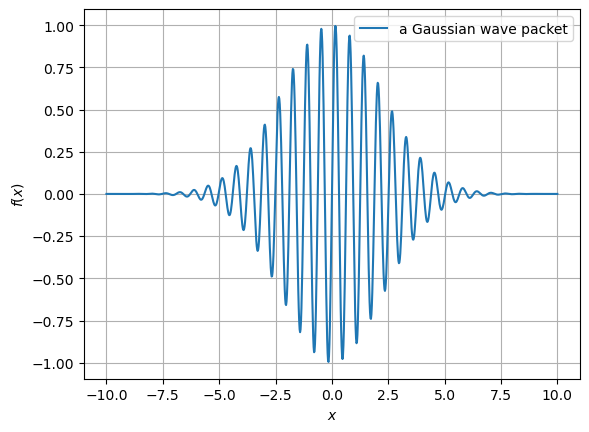

In [27]:
plotter(func = f, a = 0.1, b = 10, start = -10, stop = 10, num = 1000)

## Part 2

In [28]:
def fd(x, a=0.1, b=10):
    '''
    Returns the derivative of f
    '''
    return b*np.cos(b*x)*np.exp(-a*x*x) - 2*a*x*np.sin(b*x) * np.exp(-a*x*x)

## Part 3

In [29]:
def forward_difference(func, x, h, **kwargs):
    '''
    
    '''
    return (func(x + h, **kwargs) - func(x, **kwargs)) / h

In [30]:
forward_difference(func = f, x = 1, h = 1e-2)

-7.220096595246589

In [31]:
error = abs(fd(x = 1) - forward_difference(func = f, x = 1, h = 1e-2))
print(error)

0.27368643245679003


## Part 4

In [32]:
def central_difference(func, x, h, **kwargs):
    '''
    
    '''
    return (func(x + h, **kwargs) - func(x - h, **kwargs)) / (2*h)

In [33]:
error = abs(fd(x = 1) - central_difference(func = f, x = 1, h = 1e-2))
print(error)

0.012215278172568844


## Part 5

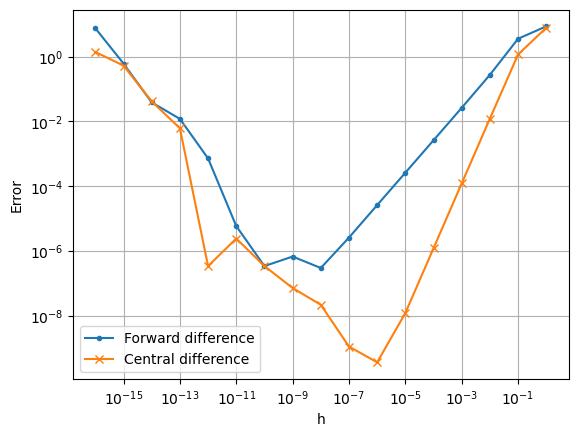

In [34]:
x = 1
h = np.logspace(-16,0, 17) 

forward_diff = forward_difference(f, x, h)
central_diff = central_difference(f, x, h)
analytical = fd(x)

forward_error = abs(forward_diff - analytical)
central_error = abs(central_diff - analytical)

fig, ax = plt.subplots()
ax.plot(h, forward_error, '.-', label ='Forward difference')
ax.plot(h, central_error, 'x-', label ='Central difference')
ax.set_xlabel('h')
ax.set_ylabel('Error')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.grid()
plt.show()

# Exercise 3, Part II: FD with Classes

Intro written here

In [35]:
class WavePacket:
    '''
    A class representation of a wave packet-function.
    '''
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, x):
        return np.sin(self.b*x)*np.exp(-self.a*x*x)
        
    def plot(self, x_min=-10, x_max=10, dx=0.01):
        '''
        A simple plotting routine for plotting f(x) in some range.
        '''
        x = np.arange(x_min, x_max, dx)
        y = self(x)
        fig = plt.figure()
        plt.plot(x, y)
        plt.grid()

    #--------------------------- Part 1 ---------------------------
    def forward_difference(self, x, h):
        '''
    
        '''
        return (self(x + h) - self(x)) / h

    def central_difference(self, x, h):
        '''
    
        '''
        return (self(x + h) - self(x - h)) / (2*h)
    #--------------------------------------------------------------

    #--------------------------- Part 2 ---------------------------
    def error_plotter(self, x): 
        '''

        '''

        h = np.logspace(-16,0, 17) 

        forward_diff = self.forward_difference(x, h)
        central_diff = self.central_difference(x, h)
        analytical = self.b*np.cos(self.b*x)*np.exp(-self.a*x*x) - 2*self.a*x*np.sin(self.b*x) * np.exp(-self.a*x*x)
        
        forward_error = abs(forward_diff - analytical)
        central_error = abs(central_diff - analytical)
        
        fig, ax = plt.subplots()
        ax.scatter(h, forward_error, 'o', label ='Forward difference')
        ax.scatter(h, central_error, 'x', label ='Central difference')
        ax.set_xlabel('h')
        ax.set_ylabel('Error')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend()
        ax.grid()
        plt.show()
        #--------------------------------------------------------------

## Part 1

## Part 2

# Exercise 4: Automatic for the people?

Below is the code for the entire exercise in one kernel to avoid having several copies of the same thing. Which part of the code is written to which part of the exercise is marked with comments. Atfer the code kernel we will elaberate on each part.  

In [71]:
class duple:
    '''
    Class for automatic differentiation
    top: function value
    bottom: derivative of function
    '''
    
    def __init__(self,top, bottom=0):
        self.top = top
        self.bottom = bottom

    def __add__(self, d): # u+v, u’+v’
        return duple(self.top + d.top, self.bottom + d.bottom )

    #--------------------------- Part 1 ---------------------------
    def __repr__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
        
    def __str__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    #--------------------------------------------------------------

    #--------------------------- Part 2 ---------------------------
    def __pos__(self):
        return duple(+ self.top, + self.bottom)

    def __neg__(self):
        return duple(- self.top, - self.bottom)

    def __sub__(self, d): 
        return duple(self.top - d.top, self.bottom - d.bottom)
    #--------------------------------------------------------------

   #--------------------------- Part 3 --------------------------- 
    def __mul__(self,d):
        return duple(self.top * d.top, (self.bottom * d.top) + (self.top * d.bottom))

    def __truediv__(self,d):
        return duple(self.top / d.top, ((self.bottom * d.top) - (self.top * d.bottom)) / (d.top * d.top))
    #--------------------------------------------------------------

#------------------------------ Part 4 ----------------------------  
class dfunction:
    def __init__(self, f, df):
        self.f = f
        self.df = df
    def __call__(self,d: duple): #chain rule sending in and returning duple
        return duple(self.f(d.top), (self.df(d.top) * d.bottom))
#------------------------------------------------------------------

## Part 1

When creating a "duple" object e.g. $x = \text{duple}(1,2)$ and try printing it, we get a bunch of nonsense. When printing $x$, it would be ideal to have a result that looked like this: $[1, 2]$. To achive this we have been asked to implement **\_\_repr\_\_** and **\_\_str\_\_**. Both these will give us a string representation of the object, but **\_\_str\_\_** is used to create a string that easly readable for the user while **\_\_repr\_\_** is meant to give more details that can be used in debugging (https://www.geeksforgeeks.org/python/str-vs-repr-in-python/).

In [53]:
#Testing the code
x = duple(1,2)
print(x) #Should return [1,2]

[1,2]


## Part 2

Despite having implented the **\_\_add\_\_** dunder method we get an error when writing $+x$, and also when writing $-x$. To implement these unary operators we use **\_\_pos\_\_** and **\_\_neg\_\_**. The unary plus operator does not really do anything other than intecating a positive value. Not that in our code we have written $+ \text{self.top}$ and $+ \text{self.bottom}$ which is reduntent, but we think it adds to the readability of the code. The unary minus operatur **\_\_neg\_\_** on the other hand negates the values (https://www.geeksforgeeks.org/python/dunder-magic-methods-python/). Lastly, we were asked to implement the $-$ operator using the **\_\_sub\_\_** method. To implement this we subtrated the top values and the bottom values. 

In [55]:
#Testing the code 
x = duple(1,2)
y = duple(3,4)
print(x - y) #Should return [-2,-2] since 1-3=-2 and 2-4=-2

[-2,-2]


## Part 3

Here we were asked to implement the $*$ operator and the $\div$ operator using **\_\_mul\_\_** and **\_\_longdiv\_\_** respectively. For the multiplication operator we multiplied the "top" of the duple like normal and for the "bottom" part we used the product rule. Simerly, for the division operator we divted the "top" part like normal and used the quotient rule for the "bottom" part. 

In [58]:
#Testing the code

#Here compare the auto diff and analytical solution. 
#These two should give the same answer. 

x = 1.2
One = duple(1.,0.) #Derivative of a constant is zero
X = duple(x,1) #Derivative of x with respect to x is 1

print("auto diff = ",X*X*X)
print("analytical = ",x*x*x, 3*x*x)

print("auto diff = ", One/(One+X))
print("analytical = ", 1/(1+x),-1/(1+x)**2)

Exp = duple(np.exp(x),np.exp(x)) #Derivative of exp(x) is exp(x)
Sin = duple(np.sin(x),np.cos(x)) #Derivative of sin(x) is cos(x)

print("auto diff = ", Exp*Sin)
print("analytical = ", np.exp(x)*np.sin(x), np.exp(x)*np.sin(x)+np.exp(x)*np.cos(x))

auto diff =  [1.728,4.32]
analytical =  1.728 4.319999999999999
auto diff =  [0.45454545454545453,-0.20661157024793386]
analytical =  0.45454545454545453 -0.20661157024793386
auto diff =  [3.0944787419716917,4.297548854694511]
analytical =  3.0944787419716917 4.297548854694511


## Part 4

If we want to use automatic diffrentiation on composite function we need to add the class **dfunction**. When creating an instance of this class you have to send in a function $f$ and its derivative $fd$. Using the **\_\_call\_\_** method the class **dfunction** can be called like a funtion, and will then return a duple where the "top" value is $f\left(g(x)\right)$, where $f(x) =$ self.f and $g(x) =$ d.top,  and the bottom "value" is the result of the chain rule. (https://www.geeksforgeeks.org/python/__call__-in-python/)

In [65]:
#Testing the code 
x = 1.2
One = duple(1.,0.) #Derivative of a constant is zero
X = duple(x,1) #Derivative of x with respect to x is 1

def f(x):
    return np.log(x)
    
def df(x):
    return 1/x
    
Log = dfunction(f,df)
Exp = dfunction(np.exp,np.exp)

print("auto diff ", Log(One+Exp(X)))
print("analytical ", np.log(1+np.exp(x)),np.exp(x)/(1+np.exp(x)))

auto diff  [1.4632824673380311,0.7685247834990176]
analytical  1.4632824673380311 0.7685247834990176


In [70]:
#Testing the code on the wavepacket

a=0.1
b=10
x=1

A=duple(a) #second argument is default 0 i.e. a constant
B=duple(b) #second argument is default 0 i.e. a constant
X=duple(x,1)

Sin=dfunction(np.sin,np.cos)

print('auto diff', Sin(B*X)*Exp(-A*X*X))
print('analytical ', np.sin(b*x)*np.exp(-a*x*x),b*np.cos(b*x)*np.exp(-a*x*x)
-2*a*x*np.sin(b*x)*np.exp(-a*x*x))

auto diff [-0.49225065733419177,-7.493783027703379]
analytical  -0.49225065733419177 -7.493783027703379


## Part 5

# Conclusion and Discussion

# Self-reflections

# Bibliography